In [1]:
import pandas as pd
import mediapipe as mp
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, BatchNormalization, Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

In [2]:
X = []
y = []
idx = []

In [3]:
cnt = 0
for i in range(10):
    
    folder= "Data/"+str(i)
    images = os.listdir(folder)
    for j,img in enumerate(images):
        if j == 0:
            idx.append(cnt)
        path = folder + "/" + img
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (64,64))
        X.append(list(img))
        y.append(i)
        cnt += 1

In [4]:
idx

[0, 1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500]

In [5]:
len(X), len(y)

(15000, 15000)

In [6]:
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((15000, 64, 64), (15000,))

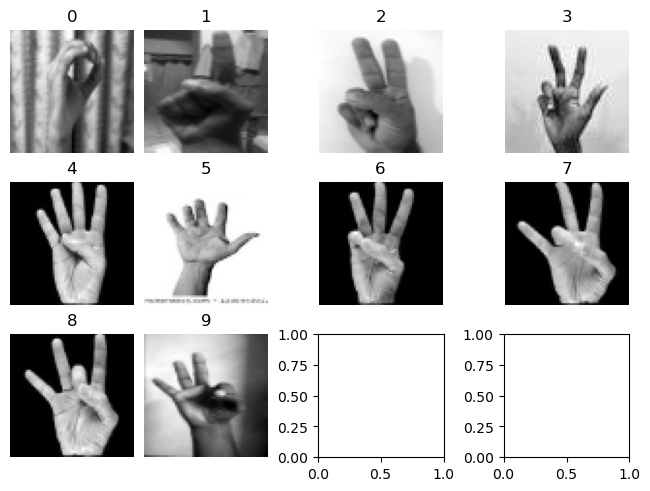

In [7]:
fig, ax = plt.subplots(3,4, constrained_layout = True)
ax = ax.flatten()
for i in range(len(idx)):
    ax[i].imshow(X[idx[i]], cmap = 'gray')
    ax[i].set_title(str(y[idx[i]]))
    ax[i].axis('off')

In [9]:
X = X.reshape((X.shape[0],64,64,1))/ 255.0

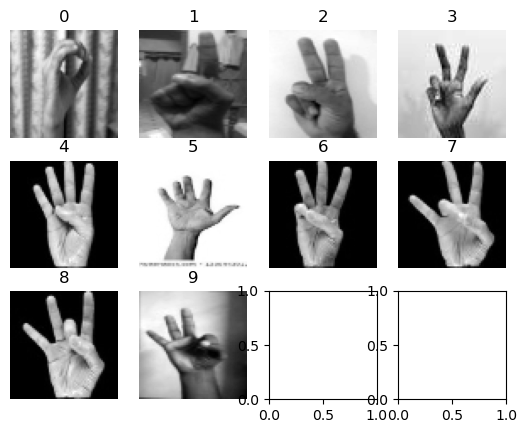

In [10]:
fig, ax = plt.subplots(3,4)
ax = ax.flatten()
for i in range(len(idx)):
    ax[i].imshow(X[idx[i]], cmap = 'gray')
    ax[i].set_title(str(y[idx[i]]))
    ax[i].axis('off')

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.33, shuffle=True)

In [12]:
X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=.25, shuffle=True)

In [13]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [14]:
model = Sequential([
    
    BatchNormalization(),
    Conv2D(32, kernel_size=(6,6), activation='relu', input_shape = (28,28,1), padding = 'same'),
    MaxPool2D(padding = 'same'),
    Dropout(.25),
    
    BatchNormalization(),
    Conv2D(64, kernel_size=(4,4), activation='relu',  padding = 'same'),
    MaxPool2D(padding = 'same'),
    Dropout(.25),
    
    BatchNormalization(),
    Conv2D(64, kernel_size=(5,5), activation='relu',  padding = 'same'),
    MaxPool2D(padding = 'same'),
    Dropout(.25),
    
    BatchNormalization(),
    Conv2D(128, kernel_size=(4,4), activation='relu',  padding = 'same'),
    MaxPool2D(padding = 'same'),
    Dropout(.25),
    
    Flatten(),
    Dropout(.25),
    Dense(128, activation='relu'),
     Dropout(.25),
    Dense(10, activation='softmax')
    
])

In [15]:
model.compile( loss='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
             )

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.0000001)

In [17]:
hist = model.fit(datagen.flow(X_train,y_train,batch_size=128),
         epochs = 35,
          validation_data=(X_val,y_val),
          shuffle=1,
           callbacks=learning_rate_reduction
         )

Epoch 1/35
59/59 [==============================] - 43s 700ms/step - loss: 2.3049 - accuracy: 0.1520 - val_loss: 2.3587 - val_accuracy: 0.1086 - lr: 0.0010
Epoch 2/35
59/59 [==============================] - 42s 709ms/step - loss: 1.9806 - accuracy: 0.2782 - val_loss: 2.5738 - val_accuracy: 0.1110 - lr: 0.0010
Epoch 3/35
59/59 [==============================] - 41s 700ms/step - loss: 1.7000 - accuracy: 0.3868 - val_loss: 2.5592 - val_accuracy: 0.1178 - lr: 0.0010
Epoch 4/35
59/59 [==============================] - 43s 724ms/step - loss: 1.3864 - accuracy: 0.4995 - val_loss: 2.8730 - val_accuracy: 0.1401 - lr: 0.0010
Epoch 5/35
59/59 [==============================] - 43s 727ms/step - loss: 1.1727 - accuracy: 0.5744 - val_loss: 2.3638 - val_accuracy: 0.2316 - lr: 0.0010
Epoch 6/35
59/59 [==============================] - 41s 695ms/step - loss: 1.0203 - accuracy: 0.6419 - val_loss: 1.9709 - val_accuracy: 0.2925 - lr: 0.0010
Epoch 7/35
59/59 [==============================] - 41s 699ms/st

In [18]:
# hist = model.fit(X_train,y_train, batch_size = 128 ,epochs = 50 , validation_data = (X_val, y_val), callbacks=learning_rate_reduction)

In [19]:
model.evaluate(X_train, y_train)

236/236 [==============================] - 9s 39ms/step - loss: 0.0058 - accuracy: 0.9987


[0.005813326686620712, 0.9986732006072998]

In [20]:
model.evaluate(X_test, y_test)

155/155 [==============================] - 6s 39ms/step - loss: 0.0557 - accuracy: 0.9842


[0.05568528175354004, 0.9842424392700195]

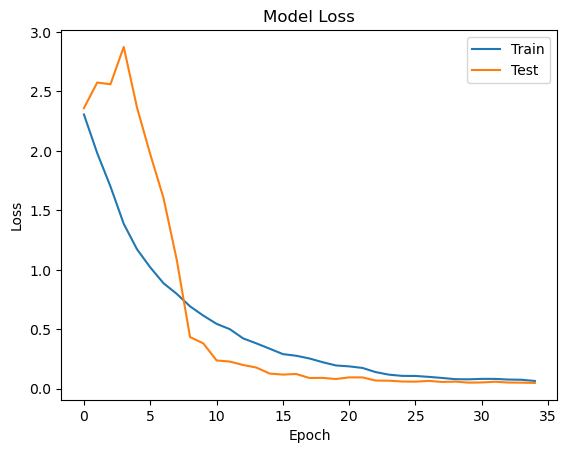

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

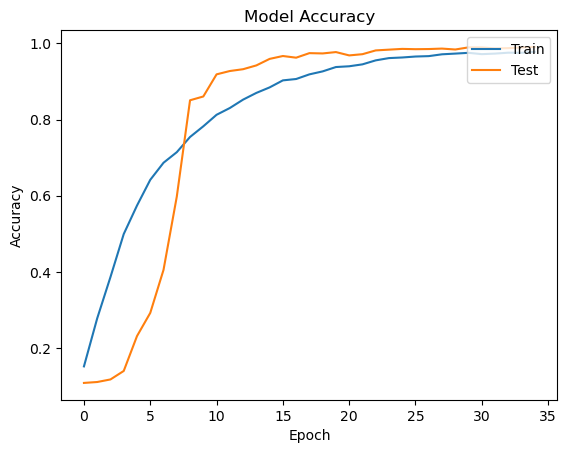

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
# model.save('dataAug1')

In [ ]:
# cnt = 0
# for i in range(len(X_test)):
#     pic = X_test[i].reshape((1,64,64,1))
#     pred = model.predict(pic)
    
#     pred = np.argmax(pred, axis=1)
#     if pred == y_test[i]:
#         cnt+=1
        
# print(cnt / len(X_test) * 100)

In [ ]:
# print(cnt / len(X_test) * 100)

In [ ]:
# model = tf.keras.models.load_model('onedata.h5')